In [24]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

In [47]:
# import dataset
olympic_history = pd.read_csv('../athlete_events.csv')
olympic_history.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [26]:
print(f'The number of rows and columns in the dataset is {olympic_history.shape}')

The number of rows and columns in the dataset is (271116, 15)


In [27]:
# we'll focus on Summer Olympic
df = olympic_history[olympic_history['Season'] == 'Summer']
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [28]:
# check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222552 entries, 0 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      222552 non-null  int64  
 1   Name    222552 non-null  object 
 2   Sex     222552 non-null  object 
 3   Age     213363 non-null  float64
 4   Height  170695 non-null  float64
 5   Weight  168698 non-null  float64
 6   Team    222552 non-null  object 
 7   NOC     222552 non-null  object 
 8   Games   222552 non-null  object 
 9   Year    222552 non-null  int64  
 10  Season  222552 non-null  object 
 11  City    222552 non-null  object 
 12  Sport   222552 non-null  object 
 13  Event   222552 non-null  object 
 14  Medal   34088 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 27.2+ MB


+ From a total 27K to 22K rows, it shows that the summer season dominates the overall data in this dataset of Olympic history.
+ df contains of 10 categorical and 5 numerical data. Data types are all appropriate.

In [29]:
# check missing values
df.isna().sum()

ID        0     
Name      0     
Sex       0     
Age       9189  
Height    51857 
Weight    53854 
Team      0     
NOC       0     
Games     0     
Year      0     
Season    0     
City      0     
Sport     0     
Event     0     
Medal     188464
dtype: int64

In [30]:
# missing values in %
for col in df.columns:
    percentage = df[col].isna().mean()*100
    if percentage != 0:
        print('{} = {}'.format(col, round(percentage,2)))

Age = 4.13
Height = 23.3
Weight = 24.2
Medal = 84.68


+ Medal has so many missing values, indicating that only few names have won a medal whether it's Gold, Silver or Bronze. 
+ We will retain the missing values in Weight, Height, and Age, as our forthcoming analysis will primarily concentrate on team or individual achievements over time.

In [31]:
# check unique value in each column
pd.set_option('display.max_colwidth', -1)
list_item = []
for col in df.columns:
    list_item.append([col, df[col].nunique()])

table_nunique = pd.DataFrame(columns=['Column Name', 'Number of Unique'], data = list_item)
table_nunique

/var/folders/xw/mw3dy2ks2z11gm1xj184b5zc0000gn/T/ipykernel_27990/805567782.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Column Name,Number of Unique
0,ID,116776
1,Name,116122
2,Sex,2
3,Age,74
4,Height,95
5,Weight,219
6,Team,1157
7,NOC,230
8,Games,29
9,Year,29


+ Each name has one ID. The ID has more unique numbers, it indicates that there are exact same names in the dataset which have different IDs.
+ NOC stands for National Olympic Committee, a 3-letter code which should relate to team's country. The team column has more unique values than NOC because this olympic data from 1896, or 128 years ago. There have been many changes in the name of the countries or the divisions of countries such as the Soviet Union splitting into Russia, Ukraine, Belarus etc.
+ Following the U.N. definition and classification, there are  195 countries in the world right now but only 23 cities or countries have hosted the Olympics.

In [32]:
# check the statistic description
display(df.describe().round(2), df.describe(include='object'))

,ID,Age,Height,Weight,Year
count,222552.00,213363.00,170695.00,168698.00,222552.00
mean,67998.93,25.67,175.52,70.69,1976.32
std,39139.04,6.70,10.91,14.80,30.94
min,1.00,10.00,127.00,25.00,1896.00
25%,34000.75,21.00,168.00,60.00,1956.00
50%,68302.50,24.00,175.00,70.00,1984.00
75%,101881.00,28.00,183.00,79.00,2000.00
max,135568.00,97.00,226.00,214.00,2016.00


,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,222552,222552,222552,222552,222552,222552,222552,222552,222552,34088
unique,116122,2,1157,230,29,1,23,52,651,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,163109,14526,15064,13821,222552,22426,38624,5733,11459


+ According to International Olympic Committee rules, there is no specific age limit to compete in the Olympic Games. The age limit depends on the rules set forth by each International Sports Federation. Therefore, 10 years old as the minimum age is not odd.
+ This dataset of Olympic games spans from 1896 up to 2016, covering 120 years of the Olympics history. The Tokyo 2020 Olympics, which was held during the of Covid-19 pandemic is not included.
+ The majority of the teams are from the USA, and London has hosted Olympic more times than any other city in the world.

In [33]:
# check duplicate data
df[df.duplicated()]
df.duplicated().sum()

1385

+ Duplicate data will remain for the next analysis because athletes may participate in multiple events or categories within the same Olympics, leading to their data appearing multiple times in the dataset.

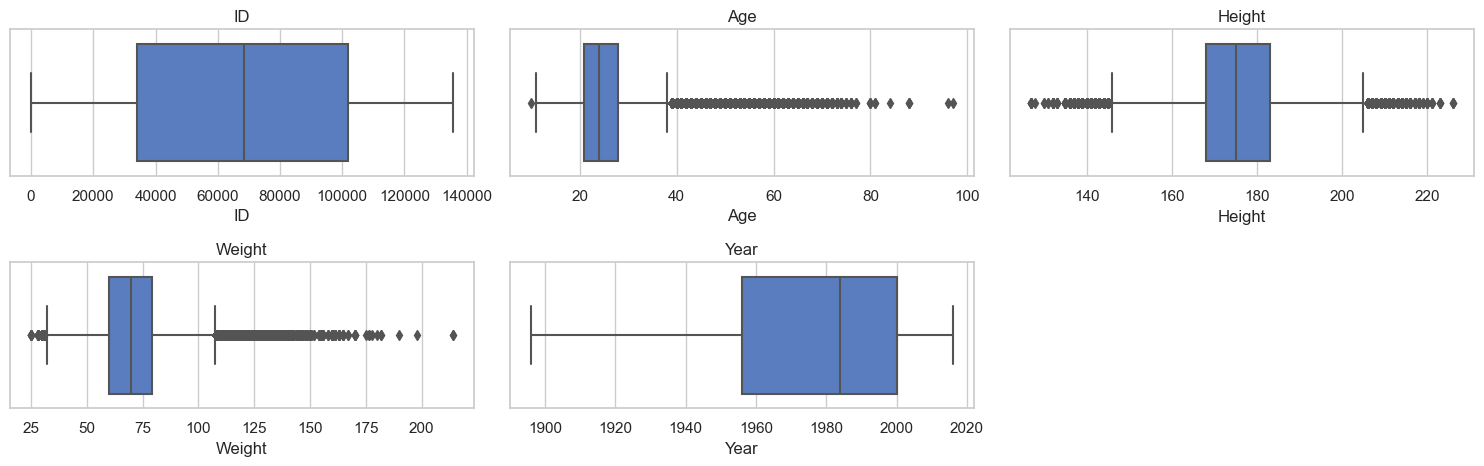

In [34]:
# check distribution in all numerical columns
plt.figure(figsize=(15,9), facecolor= 'white')
sns.set(style='whitegrid', palette='muted')
plotnumber= 1

num_cols= [feature for feature in df.columns if (df[feature].dtypes != 'O')]
for cols in num_cols:
    ax= plt.subplot(4,3, plotnumber)
    sns.boxplot(x= cols, data= df)
    plt.title(cols, fontsize= 12)
    plt.tight_layout()
    plotnumber += 1

+ Many outliers are present in age, weight and height but nothing seems unusual.

### Exploratory Data Analysis

In [35]:
# Olympics Host Cities
host_city = df.groupby('Year')['City'].first().reset_index().sort_values('Year', ascending=False)
host_city

,Year,City
28,2016,Rio de Janeiro
27,2012,London
26,2008,Beijing
25,2004,Athina
24,2000,Sydney
23,1996,Atlanta
22,1992,Barcelona
21,1988,Seoul
20,1984,Los Angeles
19,1980,Moskva


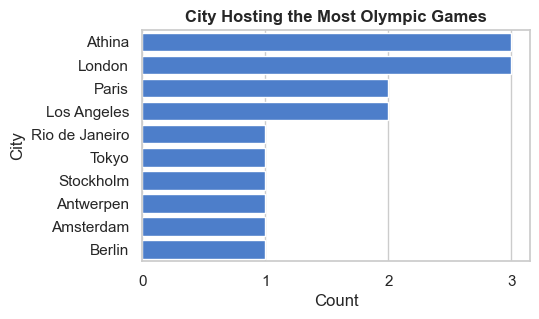

In [36]:
# cities hosting the most Olympics
most_hosted = host_city['City'].value_counts().reset_index().rename(columns={'index' : 'City', 'City' : 'Count'}).head(10)
plt.figure(figsize=(5,3))
sns.barplot(x= 'Count', 
            y= 'City', 
            palette=['#387ADF'],
            data=most_hosted)
plt.xticks(range(0, most_hosted['Count'].max() + 1, 1))
plt.title('City Hosting the Most Olympic Games', fontweight= 'bold')
plt.show()

+ Greece has hosted the Olympics twice, both in Athens or Athina. As the birthplace of the Ancient Olympic Games, it was a natural choice as host nation for the revival of the modern Olympic Games in 1896. Additionally, Greece also hosted the 2004 Summer Olympics. However, the dataset indicates that Greece hosted the Olympic three times in 1896, 1906 and 2004. The 1906 Olyimpics, also known as the Intercalated Games, were an unofficial Olympic Games held in Athens. They were termed "intercalated" because they were held between the regular Olympic Games schedule, which at the time was every four years.
+ If the 2020 Tokyo Olyimpics are included, London remains the most hosted city for Summer Olympics. <u>The 2024 Olympics are scheduled to be held in Paris. The last time Paris hosted the Olympics was in 1900 and 1924, resulting in a 100-year gap. This means that Paris will share the same title with London as the most hosted city.</u>
+ While Los Angeles and Tokyo (including the 2020 Olyimpics) have hosted twice, all other cities have held the opportunity to host only once in the 120-year history of the Olympics.

In [37]:
# trend of participation over time
num_country_part = df.groupby(['Year'])['NOC'].nunique().reset_index()
num_athlete_part = df.groupby(['Year'])['Name'].nunique().reset_index()
num_sport_part = df.groupby(['Year'])['Sport'].nunique().reset_index()
gender_part = df.groupby(['Year', 'Sex']).size().reset_index(name='Count')

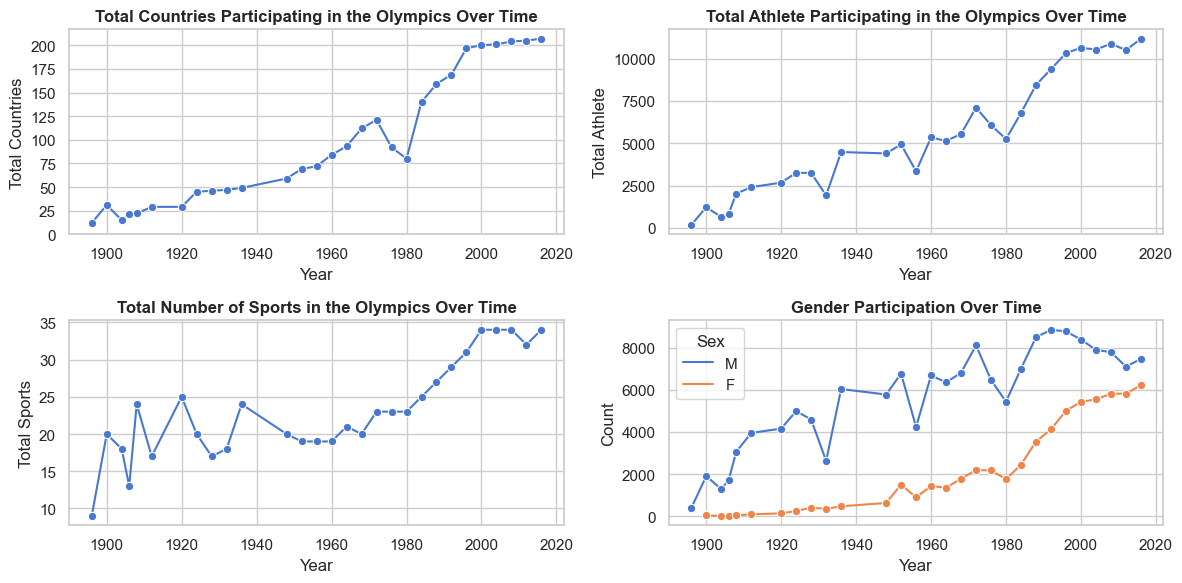

In [38]:
# visualize the trend
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.lineplot(data = num_country_part, x= 'Year', y= 'NOC', marker= 'o')
plt.title('Total Countries Participating in the Olympics Over Time', fontweight= 'bold')
plt.ylabel('Total Countries')
plt.yticks(range(0, num_country_part['NOC'].max() + 1, 25))

plt.subplot(2,2,2)
sns.lineplot(data = num_athlete_part, x= 'Year', y= 'Name', marker= 'o')
plt.title('Total Athlete Participating in the Olympics Over Time', fontweight= 'bold')
plt.ylabel('Total Athlete')

plt.subplot(2,2,3)
sns.lineplot(data = num_sport_part, x= 'Year', y= 'Sport', marker= 'o')
plt.title('Total Number of Sports in the Olympics Over Time', fontweight= 'bold')
plt.ylabel('Total Sports')

plt.subplot(2,2,4)
sns.lineplot(data = gender_part, x= 'Year', y= 'Count', hue= 'Sex', marker= 'o')
plt.title('Gender Participation Over Time', fontweight= 'bold')
plt.ylabel('Count')
plt.legend(title='Sex')

plt.tight_layout()
plt.show()

#### Some interesting facts:
+ Even though the trend increases over time, the 1980 Olympics must be highlighted due to a significant decrease in countries and athletes participating. This decrease occurred because of the boycott led by the United States president, Jimmy Carter, against the Soviet Union. The USA, along with 64 other countries, boycotted the Olympics. (source: https://2001-2009.state.gov/r/pa/ho/time/qfp/104481.htm ).
+ Based on the previous statistical analysis, it is evident that the majority of participants were from the USA. However, it is notable that they did not participate in the 1980 Olympics.
+ There is a very volatile total number of sports at the beginning, continuously increasing until the 2000 Olympics, and then a decline in Beijing 2008 compared to London 2012. This decline is influenced by factors such as changes in popularity, the addition or removal of sports, and host city preferences.
    
+ <u>The most interesting aspect is the narrowing gap between male and female participation in the Olympics over the past 120 years. The volatility in male participation, decreasing from 1992 to 2012, and the continuos increase in female participation until the 2016 Olympics are significant and notable trends observed in this dataset.</u> 

In [39]:
# No USA in the 1980 Olympics
olympic_1980 = df[df['Year'] == 1980]
olympic_1980[olympic_1980['NOC']=='USA']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


<Figure size 1000x500 with 0 Axes>

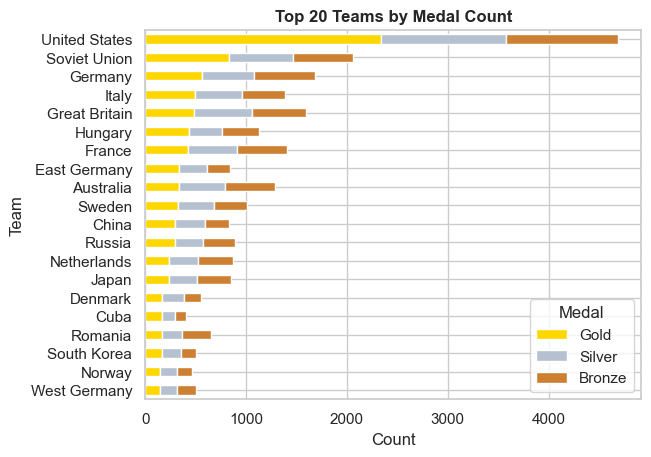

In [40]:
# team/country with the most total medal in 120 years Olympics
stats = df.groupby(['Team', 'Medal']).size().reset_index()
medal_order = ['Gold', 'Silver', 'Bronze']
medal_stats = stats.pivot(index='Team',columns='Medal', values=0).reindex(columns=medal_order).sort_values('Gold', ascending=False).head(20) #top 20
# medal_stats

medal_stats = medal_stats.iloc[::-1]
plt.figure(figsize=(10, 5))
colors = ['#FFD700', '#B5C0D0', '#CD7F32']
medal_stats.plot.barh( stacked=True, color=colors)
plt.title('Top 20 Teams by Medal Count', fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Team')
plt.legend(title='Medal')
plt.show()

+ The United States or USA truly dominates the medal tally. It's noteworthy that they did not participate in the 1980 Olympics. They are followed by the Soviet Union and Germany. Even when combining the Soviet Union's medals with Russia's, their total cannot be surpassed.
+ The United States has consistently performed well across multiple Olympics.

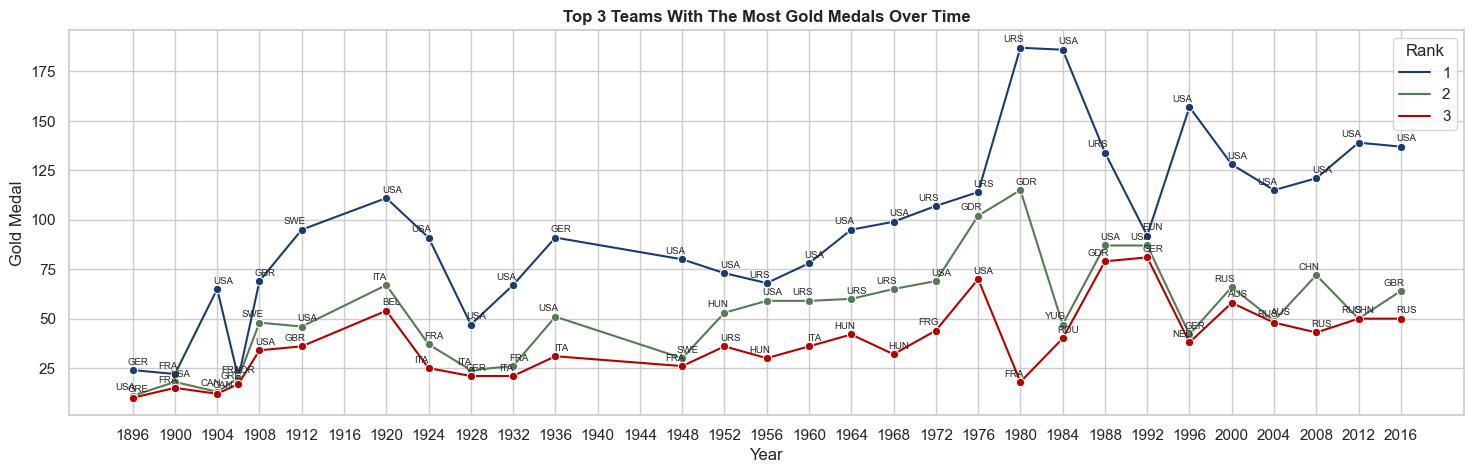

In [41]:
# top 3 over time (teams with the most gold medals)
gold = df[df['Medal'] == 'Gold']
gold_counts = gold.groupby(['Year', 'NOC', 'Team']).size().reset_index(name='Gold Count').sort_values(by=['Year', 'Gold Count'], ascending=[True, False])
top_3_gold = gold_counts.groupby('Year').head(3).copy()

top_3_gold['Rank'] = top_3_gold.groupby('Year')['Gold Count'].rank(method='first', ascending=False)
top_3_gold['Rank'] = top_3_gold['Rank'].astype(int)
top_3_gold = top_3_gold.reset_index(drop=True)

plt.figure(figsize=(18, 5))
colors = {1: '#1B3C73', 2: '#557C55', 3: '#B80000'}
sns.lineplot(data=top_3_gold, x='Year', y='Gold Count', hue='Rank', marker='o', palette=colors)
plt.title('Top 3 Teams With The Most Gold Medals Over Time', fontweight='bold')
plt.xlabel('Year')
plt.xticks(range(min( top_3_gold['Year']),max(top_3_gold['Year']) + 1, 4))
plt.ylabel('Gold Medal')
plt.legend(title='Rank')

for i, team in enumerate(top_3_gold['NOC']):
    offset = 4 if i % 2 == 0 else -5
    plt.annotate(team, (top_3_gold['Year'].iloc[i], top_3_gold['Gold Count'].iloc[i]),
                 textcoords="offset points", xytext=(offset, 4), ha='center', fontsize= 7)
plt.show()

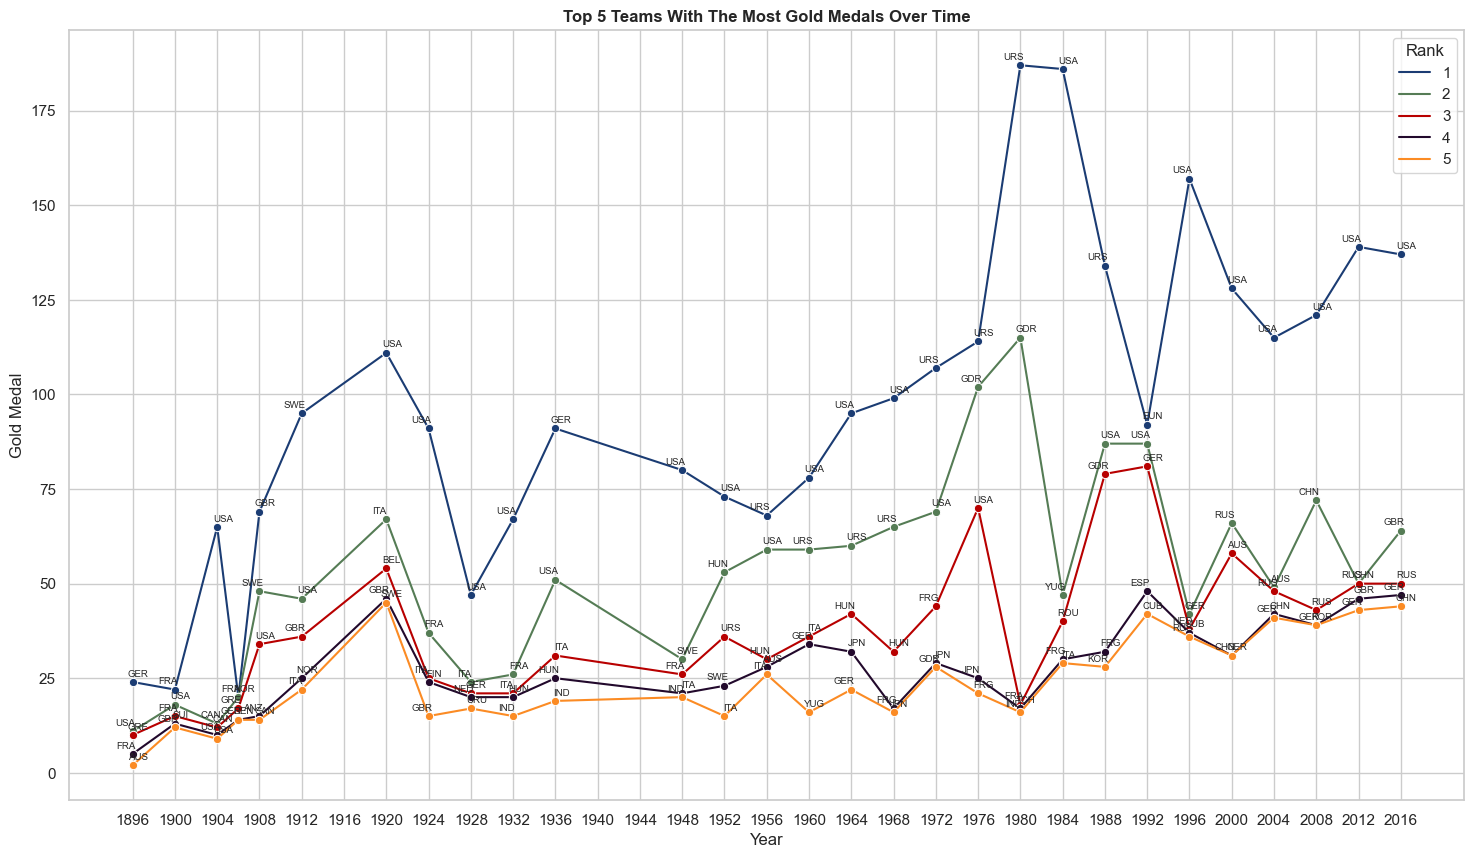

In [42]:
# top 5 over time (teams with the most gold medals)
top_5_gold = gold_counts.groupby('Year').head(5).copy()

top_5_gold['Rank'] = top_5_gold.groupby('Year')['Gold Count'].rank(method='first', ascending=False)
top_5_gold['Rank'] = top_5_gold['Rank'].astype(int)
top_5_gold = top_5_gold.reset_index(drop=True)

plt.figure(figsize=(18, 10))
colors = {1: '#1B3C73', 2: '#557C55', 3: '#B80000', 4: '#22092C', 5: '#FB8B24'}
sns.lineplot(data=top_5_gold, x='Year', y='Gold Count', hue='Rank', marker='o', palette=colors)
plt.title('Top 5 Teams With The Most Gold Medals Over Time', fontweight='bold')
plt.xlabel('Year')
plt.xticks(range(min( top_5_gold['Year']),max(top_5_gold['Year']) + 1, 4))
plt.ylabel('Gold Medal')
plt.legend(title='Rank')

for i, team in enumerate(top_5_gold['NOC']):
    offset = 4 if i % 2 == 0 else -5
    plt.annotate(team, (top_5_gold['Year'].iloc[i], top_5_gold['Gold Count'].iloc[i]),
                 textcoords="offset points", xytext=(offset, 4), ha='center', fontsize= 7)
plt.show()

+ ##### Once again, USA or the United States dominates the Olympic championship, consistently earning the most gold medals in almost every Olympic games, both before and after the 21st century. They are followed by teams such as the Soviet Union (then), Russia, Great Britain, China, Germany and others.
+ France (FRA) hasn't performed particularly well in the Olympics. The last time they made it into the top 5 was in 1986. With France hosting the Olympics in 2024, will they be able to become champions or at least make it into the top 3 or top 5? Let's find out this year! 
+ Olympics are ranked based on gold medals because the gold medal is traditionally seen as the highest honor awarded to an athlete for winning an event. Let's delve into which sport contributes the most gold for the USA as the dominant champion.

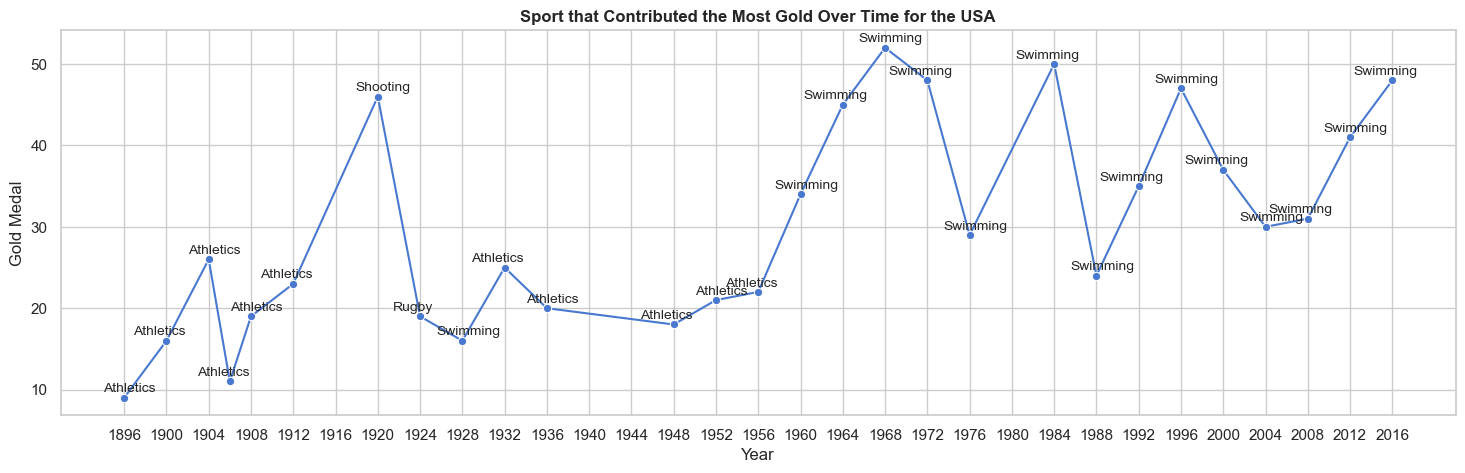

In [43]:
# sport contribute most gold for the USA over time
usa_gold = gold[gold['NOC'] == 'USA']
usa_gold_count = usa_gold.groupby(['Year','Sport']).size().reset_index(name='Gold Count')
max_usa_gold_per_year = usa_gold_count.loc[usa_gold_count.groupby('Year')['Gold Count'].idxmax()]
# max_usa_gold_per_year

plt.figure(figsize=(18, 5))
sns.lineplot(data=max_usa_gold_per_year, x='Year', y='Gold Count', marker='o')
plt.title('Sport that Contributed the Most Gold Over Time for the USA', fontweight='bold')
plt.xlabel('Year')
plt.xticks(range(min( max_usa_gold_per_year['Year']),max(max_usa_gold_per_year['Year']) + 1, 4))
plt.ylabel('Gold Medal')

for i, team in enumerate(max_usa_gold_per_year['Sport']):
    offset = 4 if i % 2 == 0 else -5
    plt.annotate(team, (max_usa_gold_per_year['Year'].iloc[i], max_usa_gold_per_year['Gold Count'].iloc[i]),
                 textcoords="offset points", xytext=(offset, 4), ha='center', fontsize= 10)
plt.show()

+ Swimming has been the sport that contributed the most gold for the USA since 1960 until the 2016 Olympics. Being the dominating country for the most medals and overall champion in Olympic history, Americans excel in swimming.
+ According to the data provided in https://web.archive.org/web/20200211123645id_/https://www.zora.uzh.ch/id/eprint/105890/1/R%C3%BCst%20THE%20RELATIONSHIP%20BETWEEN%20NATIONALITY%20AND%20PERFORMANCE%20IN%20SUCCESSFUL%20ATTEMPTS%20TO%20SWIM%20ACROSS%20THE%20%E2%80%98ENGLISH%20CHANNEL%E2%80%99%20%E2%80%93%20A%20RETROSPECTIVE%20DATA%20ANALYSIS%20FROM%201875%20TO%202012.pdf , women and men from Great Britain, Australia, and the United States of America represented the largest number of successful solo swimmers, and swimmers from these countries also achieved the fastest swimming times. Let's explore the top 3 gold medalists in swimming from this dataset."

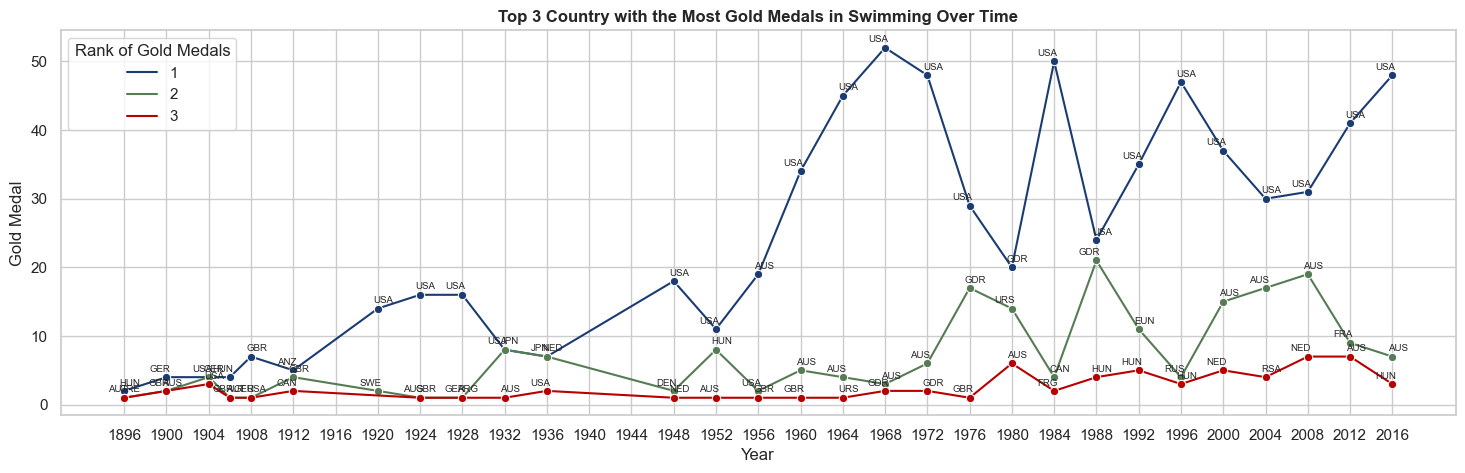

In [44]:
# top 3 the most gold medals in swimming
swimming_gold = gold[gold['Sport'] == 'Swimming']
swimming_gold_count = swimming_gold.groupby(['Year', 'NOC', 'Team']).size().reset_index(name='Gold Count').sort_values(by=['Year', 'Gold Count'], ascending=[True, False])
top_3_swimming_gold= swimming_gold_count.groupby('Year').head(3).copy()

top_3_swimming_gold['Rank'] = top_3_swimming_gold.groupby('Year')['Gold Count'].rank(method='first', ascending=False)
top_3_swimming_gold['Rank'] = top_3_swimming_gold['Rank'].astype(int)
top_3_swimming_gold = top_3_swimming_gold.reset_index(drop=True)

plt.figure(figsize=(18, 5))
colors = {1: '#1B3C73', 2: '#557C55', 3: '#B80000'}
sns.lineplot(data=top_3_swimming_gold, x='Year', y='Gold Count', hue='Rank', marker='o', palette=colors)
plt.title('Top 3 Country with the Most Gold Medals in Swimming Over Time', fontweight='bold')
plt.xlabel('Year')
plt.xticks(range(min( top_3_swimming_gold['Year']),max(top_3_swimming_gold['Year']) + 1, 4))
plt.ylabel('Gold Medal')
plt.legend(title='Rank of Gold Medals')

for i, team in enumerate(top_3_swimming_gold['NOC']):
    offset = 4 if i % 2 == 0 else -5
    plt.annotate(team, (top_3_swimming_gold['Year'].iloc[i], top_3_swimming_gold['Gold Count'].iloc[i]),
                 textcoords="offset points", xytext=(offset, 4), ha='center', fontsize= 7)
plt.show()

+ The chart clearly shows that the United States, Australia, Great Britain, and several other European countries dominate the swimming category. 
+ Without attributing it solely to inherent racial factors, have you noticed that successful swimmers are predominantly of European descent, while the fastest runners are predominantly of African descent? (https://www.witpress.com/elibrary/dne-volumes/5/3/454) Let's check in athletics sport.

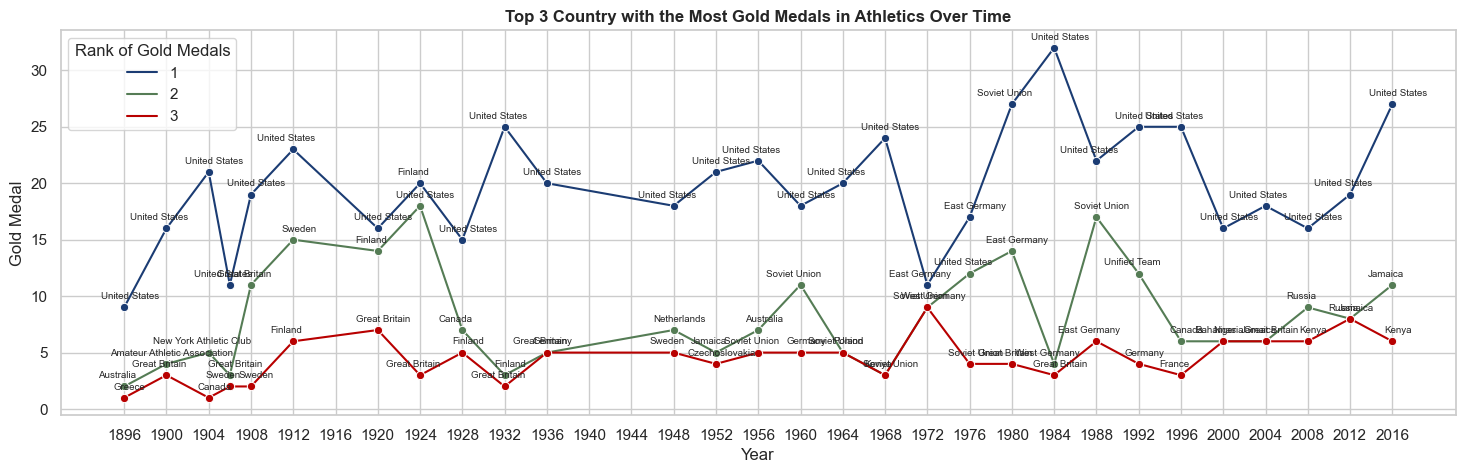

In [45]:
# top 3 the most gold in athletics
athletics_gold = gold[gold['Sport'] == 'Athletics']
athletics_gold_count = athletics_gold.groupby(['Year', 'NOC', 'Team']).size().reset_index(name='Gold Count').sort_values(by=['Year', 'Gold Count'], ascending=[True, False])
top_3_athletics_gold= athletics_gold_count.groupby('Year').head(3).copy()

top_3_athletics_gold['Rank'] = top_3_athletics_gold.groupby('Year')['Gold Count'].rank(method='first', ascending=False)
top_3_athletics_gold['Rank'] = top_3_athletics_gold['Rank'].astype(int)
top_3_athletics_gold = top_3_athletics_gold.reset_index(drop=True)

plt.figure(figsize=(18, 5))
colors = {1: '#1B3C73', 2: '#557C55', 3: '#B80000'}
sns.lineplot(data=top_3_athletics_gold, x='Year', y='Gold Count', hue='Rank', marker='o', palette=colors)
plt.title('Top 3 Country with the Most Gold Medals in Athletics Over Time', fontweight='bold')
plt.xlabel('Year')
plt.xticks(range(min( top_3_athletics_gold['Year']),max(top_3_athletics_gold['Year']) + 1, 4))
plt.ylabel('Gold Medal')
plt.legend(title='Rank of Gold Medals')

for i, team in enumerate(top_3_athletics_gold['Team']):
    offset = 4 if i % 2 == 0 else -5
    plt.annotate(team, (top_3_athletics_gold['Year'].iloc[i], top_3_athletics_gold['Gold Count'].iloc[i]),
                 textcoords="offset points", xytext=(offset, 6), ha='center', fontsize= 7)
plt.show()

+ Even though the United States still holds the most gold medals in athletics, the major difference lies in the top 3 countries with the most gold medals in athletics. Countries with predominantly African descent populations, such as Kenya and Jamaica, have emerged as dominant forces, particularly since the 2000s. The question arises: will this trend persist in the Paris 2024 Olympics?

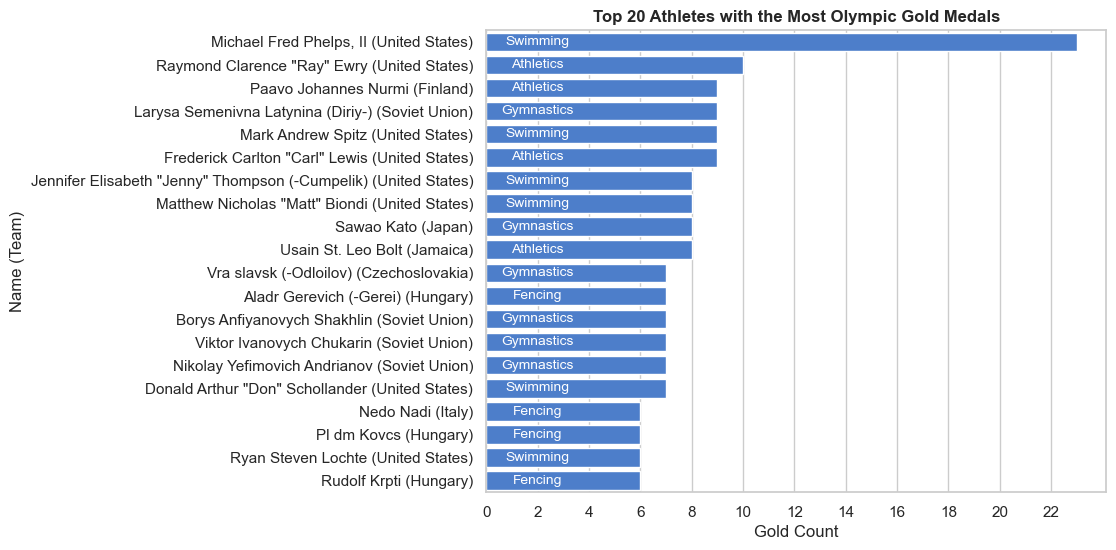

In [46]:
# athletes with the most Olympic gold medals
athlete_most_gold = gold.groupby(['Name', 'NOC', 'Team', 'Sport']).size().reset_index(name= 'Gold Count').sort_values(by=['Gold Count'], ascending=False).head(20)
athlete_most_gold['Name (Team)'] = athlete_most_gold['Name'] + ' (' + athlete_most_gold['Team'] + ')'
athlete_most_gold.drop(['Name', 'Team'], axis=1, inplace=True)

plt.figure(figsize=(8,6))
sns.barplot(x= 'Gold Count', 
            y= 'Name (Team)', 
            palette=['#387ADF'],
            data=athlete_most_gold)
for i, sport in enumerate(athlete_most_gold['Sport']):
    plt.text(2 , i, sport, va= 'center', ha= 'center', fontsize=10, color= 'white')

plt.xticks(range(0, athlete_most_gold['Gold Count'].max() + 1, 2))
plt.title('Top 20 Athletes with the Most Olympic Gold Medals', fontweight= 'bold')
plt.show()

+ Above is a list of the top 20 athletes with the most gold medals in the 120-year history of the Olympics, or it's safe to say, in this dataset
+ According to this source https://www.britannica.com/topic/list-of-athletes-with-the-most-Olympic-medals there are several same names listed as athletes with the most gold medals. American swimmer Michael Phelps, aged 38, is the most decorated Olympian of all time with 23 gold medals. He is truly the greatest of all time (GOAT) in Olympic gold medals. He is followed by Raymond Clarence, also from the United States, with 10 gold medals, while the rest have fewer than ten.

<span style="color:yellow; font-size:25px"> Closing Remarks:</span>
+ The United States has really owned it over the years, snagging the most gold and overall medals, along with boasting the athlete with the most gold medals ever.
+ It's pretty cool to see how the gender gap in Olympic participation has been shrinking over the past 120 years.
+ There's a big gap in Swimming and Athletics, with mostly Europeans dominating swimming and mainly Africans leading the charge in running.

+ This dataset contains Olympic Games data spanning 120 years, from the inaugural event in Athens in 1896 to the Rio de Janeiro Games in 2016. Notably, it excludes the most recent Olympics, Tokyo 2020, held amidst the pandemic, devoid of spectators or the usual crowd fervor. This whole situation was quite different from the usual four-year spectacle. Looking ahead, the anticipation rests on the 2024 Paris Olympics to potentially reignite a sense of unity among humanity. Sport has an incredible way of bringing people together, regardless of their backgrounds or circumstances. It remains a powerful force, capable of uniting people across physical, economic, and social spectrums.
